# Prediction of the percentage of an student based on the no. of study hours. 


## Importing important libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## importing dataset from the given url

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

# Explonatary data analysis

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Our dataset contain two variable Hours and score. Datatype of Hour variable is float and Scores has int type

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Dataset does not contain any null value

In [5]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Density'>

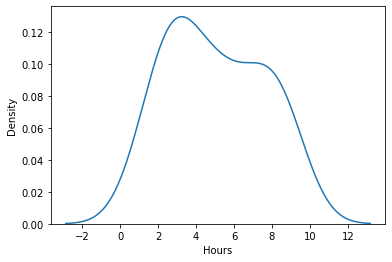

In [6]:
sns.kdeplot(data=data, x="Hours")

If we see density of a Hours then it is very clear that its bimodel. 

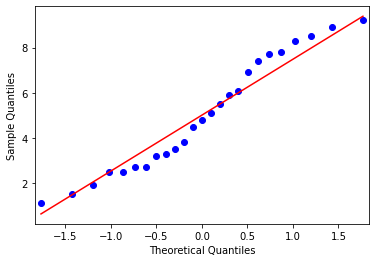

In [7]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(data['Hours'], line='s')
plt.show()

from above qq plot we can observe that all the point are very close to the line and some are on the line. hence we can conclude that variable Hours is normaly distributed. 

In [8]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data['Hours'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.940, p=0.149
Sample looks Gaussian (fail to reject H0)


also from above shapiro test we can conclude that variable Hours is from a normal population.

sample is from normal distribution

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

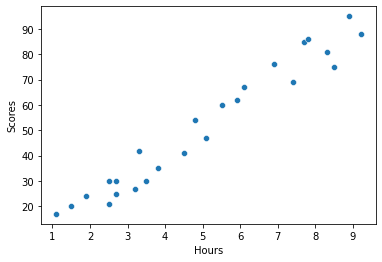

In [9]:
sns.scatterplot(data=data, x="Hours", y="Scores")

their is positive and linear relation between Hours and score variable.

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Their is a positive correlation between Houres and Score. So here we can fit linear model by taking Scores as a respoce and Hours as regressor variable

## Fitting simple linear regresion model

In [11]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

### spliting dataset into training and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [14]:
y_pred=reg.predict(X_test)
yp=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
y_test

array([[85],
       [60],
       [24],
       [25],
       [69]], dtype=int64)

In [15]:
yp=np.array(yp)

In [16]:
y_test=np.array(y_test)

In [17]:
comparison=np.concatenate((y_test,yp),axis=1)

In [18]:
print(comparison)

[[85.         77.38972759]
 [60.         56.01035813]
 [24.         21.02593538]
 [25.         28.80025154]
 [69.         74.47435903]]


In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9569656415538802

95.69% variation is explain by the fitted regression line.

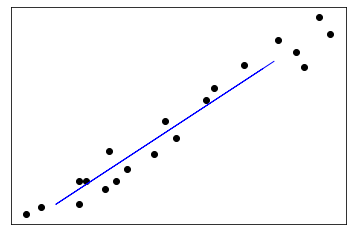

In [20]:
plt.scatter(X_train,y_train,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

as all the points are close to and on a fitted regresion line so we can say that fitted line is good.

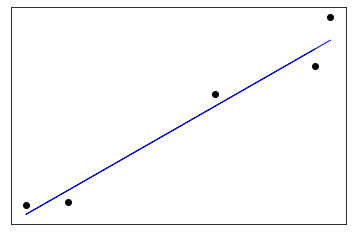

In [21]:
plt.scatter(X_test,y_test,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

see carefully in the above plot. this plot is based on test dataset we can see very clearly that test datapoints are close to a fitted line. So we can conclude that fitted regression line is goodly fitted.